In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_parquet('data/LDAP-training.parquet')
df = pd.concat([df, pd.read_parquet('data/LDAP-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-testing.parquet')])
df['Label'].value_counts()

Label
Benign           8836
LDAP             1884
DrDoS_LDAP       1440
NetBIOS           644
DrDoS_NetBIOS     598
Name: count, dtype: int64

In [8]:
# perform KPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(df.drop(['Label'], axis=1))


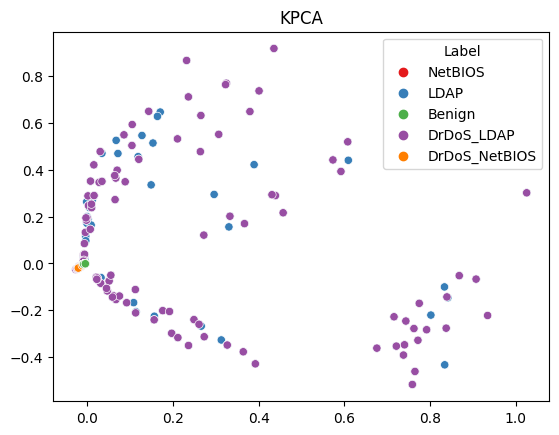

In [9]:
# plot the result sns
import seaborn as sns
sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1], hue=df['Label'], palette='Set1')
plt.title('KPCA')
plt.show()
